<a href="https://colab.research.google.com/github/elangbijak4/LLM-SLM-Examples/blob/main/Transformer_Sentimen_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Text: "I love this product! It's amazing."
Sentiment: Positive, Confidence: 0.9999

Text: "I hate this. It's the worst experience ever."
Sentiment: Negative, Confidence: 0.9998

Text: "This is the best thing I've bought in a while."
Sentiment: Positive, Confidence: 0.9985

Text: "I'm very disappointed with the service."
Sentiment: Negative, Confidence: 0.9998

Text: "Overall, I'm very satisfied and happy."
Sentiment: Positive, Confidence: 0.9999



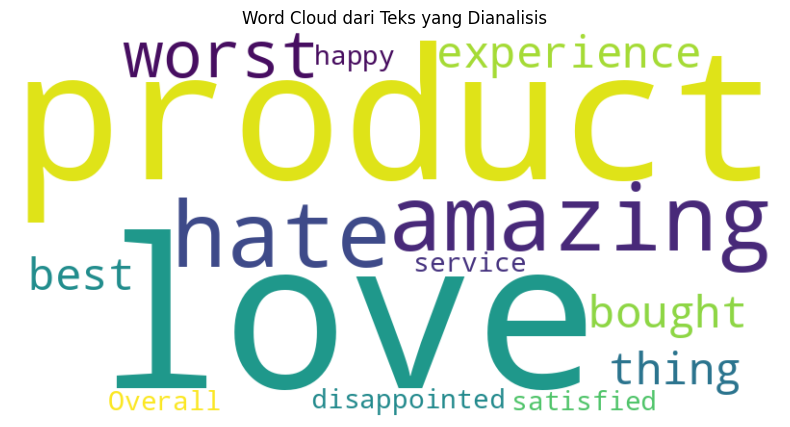

In [ ]:

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Muat model pra-latih dan tokenizer
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

# Fungsi untuk melakukan analisis sentimen
def analyze_sentiment(text):
    # Tokenisasi teks
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    # Lakukan inferensi
    outputs = model(**inputs)
    # Ambil skor logit dari model
    logits = outputs.logits
    # Hitung probabilitas
    probs = torch.softmax(logits, dim=-1)
    # Ambil label dengan probabilitas tertinggi
    sentiment = torch.argmax(probs, dim=1).item()
    # Konversi label menjadi teks
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    return sentiment_label, probs[0][sentiment].item()

# Contoh penggunaan
texts = [
    "I love this product! It's amazing.",
    "I hate this. It's the worst experience ever.",
    "This is the best thing I've bought in a while.",
    "I'm very disappointed with the service.",
    "Overall, I'm very satisfied and happy."
]

sentiments = []

for text in texts:
    sentiment, confidence = analyze_sentiment(text)
    sentiments.append((text, sentiment, confidence))
    print(f'Text: "{text}"')
    print(f'Sentiment: {sentiment}, Confidence: {confidence:.4f}\n')

# Gabungkan semua teks yang dianalisis
all_texts = " ".join([text for text, sentiment, confidence in sentiments])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_texts)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Teks yang Dianalisis')
plt.show()